In [40]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [6]:
start=pd.to_datetime('2006/1/1')
end=pd.to_datetime('2016/1/1')

In [11]:
#getting stock info for 5 banks (Bank of America, CitiGroup, Goldman Sachs, JP Morgan, Morgan Stanley, Wells Fargo)
BAC = data.DataReader("BAC", 'google', start, end)
C = data.DataReader("C", 'google', start, end)
GS = data.DataReader("GS", 'google', start, end)
JPM = data.DataReader("JPM", 'google', start, end)
MS = data.DataReader("MS", 'google', start, end)
WFC = data.DataReader("WFC", 'google', start, end)

In [12]:
tickers=['BAC','C','GS','JPM','MS','WFC']

In [16]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],keys=tickers,axis=1)

In [17]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [21]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

In [29]:
# max Close price for each bank's stock throughout the time period
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [37]:
returns=pd.DataFrame()

In [38]:
for i in tickers:
    returns[i+' Return']=bank_stocks[i]['Close'].pct_change()
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.000951
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005714
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586    0.000000

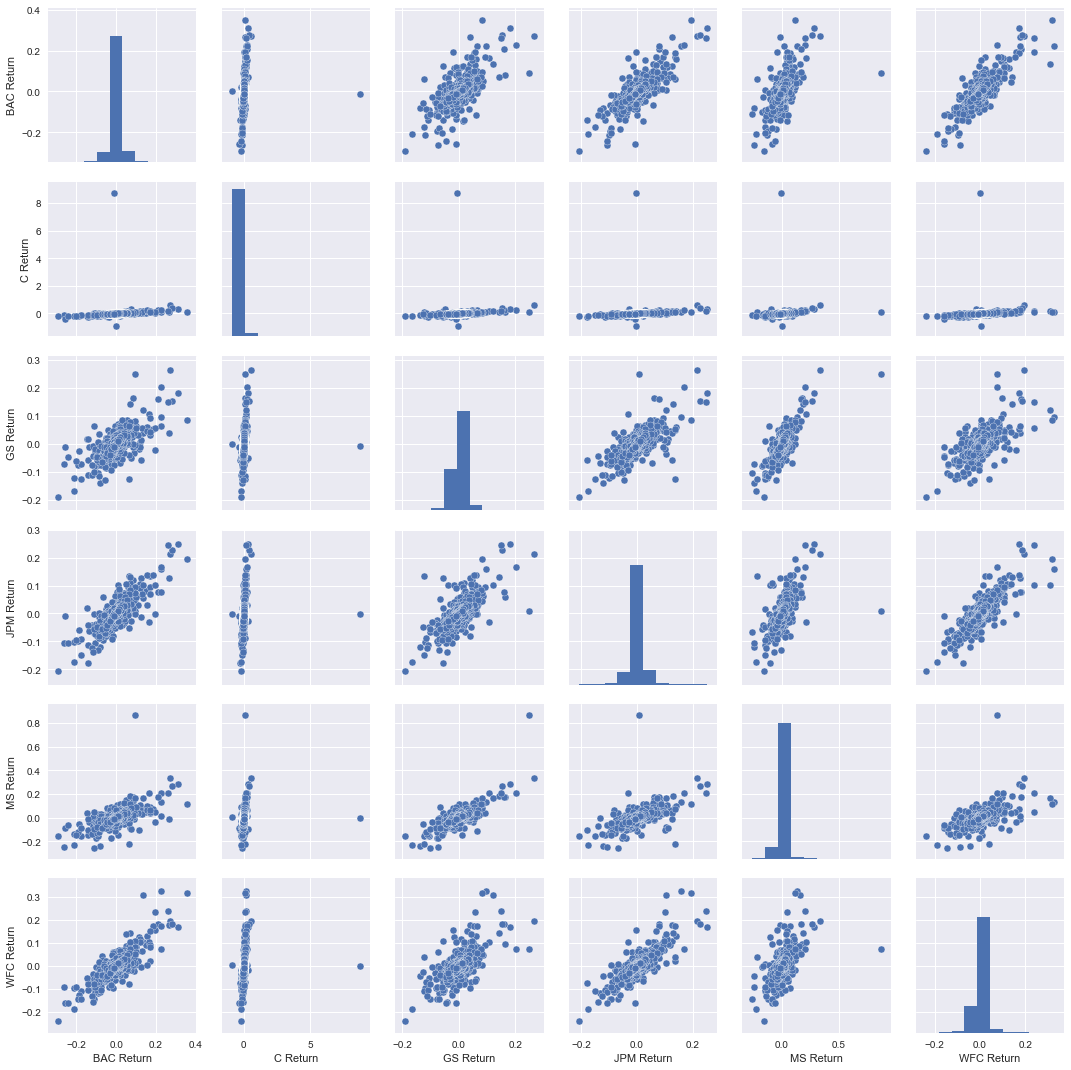

In [44]:
g=sns.pairplot(returns[1:])

In [47]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [48]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [49]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [53]:
returns.ix['2015-1-1':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

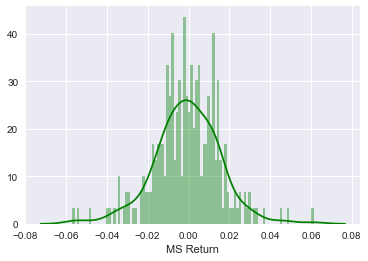

In [55]:
sns.distplot(returns.ix['2015-1-1':'2015-12-31']['MS Return'],color='green',bins=100)

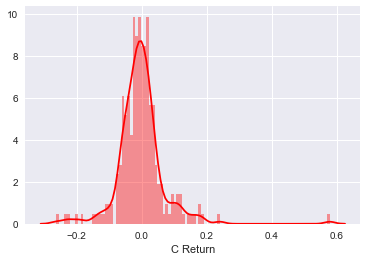

In [56]:
sns.distplot(returns.ix['2008-1-1':'2008-12-31']['C Return'],color='red',bins=100)

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

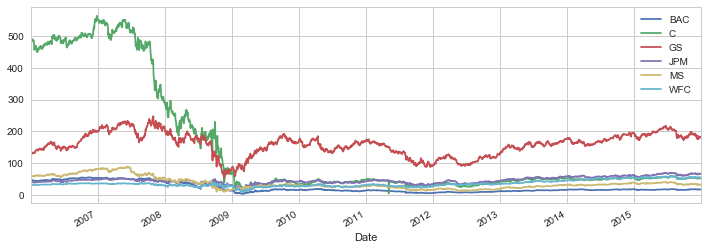

In [75]:
for i in tickers:
    bank_stocks[i]['Close'].plot(figsize=(12,4),label=i)
plt.legend()

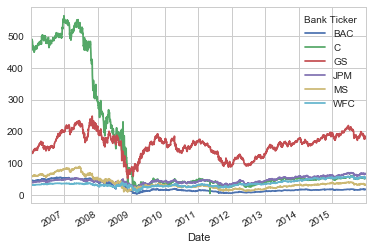

In [76]:
bank_stocks.xs(key='Close',level='Stock Info',axis=1).plot()

In [61]:
bank_stocks.xs(key='Close',level='Stock Info',axis=1).iplot()

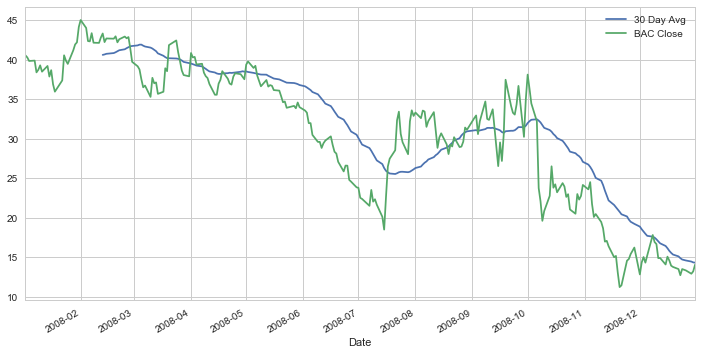

In [65]:
plt.figure(figsize=(12,6))
BAC['Close'].ix['2008-1-1':'2008-12-31'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].ix['2008-1-1':'2008-12-31'].plot(label='BAC Close')
plt.legend()

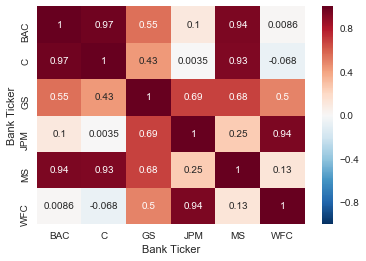

In [73]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

C:\Users\Disha\Anaconda2\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



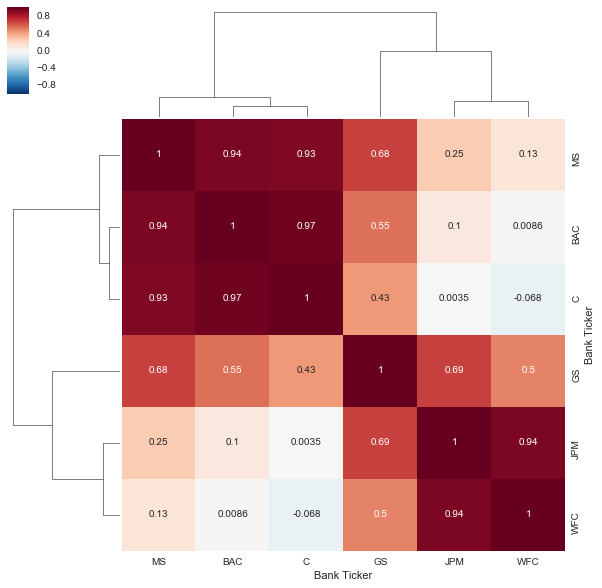

In [72]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [77]:
cc=bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
cc.iplot(kind='heatmap',colorscale='rdylbu')

In [78]:
BAC[['Open','High','Low','Close']].ix['2015-1-1':'2016-1-1'].iplot(kind='candle')

C:\Users\Disha\Anaconda2\lib\site-packages\plotly\tools.py:1422: UserWarning:

plotly.tools.FigureFactory.create_candlestick is deprecated. Use plotly.figure_factory.create_candlestick



In [81]:
MS['Close'].ix['2015-1-1':'2015-12-31'].ta_plot(study='sma',periods=[13,21,55],title='Simply Moving Averages-Morgan Stanley')

In [82]:
BAC['Close'].ix['2015-1-1':'2015-12-31'].ta_plot(study='boll')